# Data preprocessing

- Scaling between 0 and 1 because we have a lot of dummies and boolean values
- Feature engineering using filter and RFE

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline
sns.set()

pd.set_option('max_columns',70)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('../data/airbnb_paris_clean_dummies.csv')
print(df.shape)
df.head()

(62837, 62)


,host_is_superhost,host_identity_verified,accommodates,bathrooms,bedrooms,price,guests_included,extra_people,availability_365,number_of_reviews,instant_bookable,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,time_since_host,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_rate_25-50%,host_response_rate_50-75%,host_response_rate_75-100%,host_response_rate_None,neighbourhood_cleansed_Bourse,neighbourhood_cleansed_Buttes-Chaumont,neighbourhood_cleansed_Buttes-Montmartre,neighbourhood_cleansed_Entrepôt,neighbourhood_cleansed_Gobelins,neighbourhood_cleansed_Hôtel-de-Ville,neighbourhood_cleansed_Louvre,neighbourhood_cleansed_Luxembourg,neighbourhood_cleansed_Ménilmontant,neighbourhood_cleansed_Observatoire,neighbourhood_cleansed_Opéra,neighbourhood_cleansed_Palais-Bourbon,neighbourhood_cleansed_Panthéon,neighbourhood_cleansed_Passy,neighbourhood_cleansed_Popincourt,neighbourhood_cleansed_Reuilly,neighbourhood_cleansed_Temple,neighbourhood_cleansed_Vaugirard,neighbourhood_cleansed_Élysée,property_type_Bed and breakfast,property_type_Boutique hotel,property_type_Condominium,property_type_Hotel,property_type_House,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,0,0,8,2.0,3.0,256.0,6,30.0,284,29,1,0,0,1900,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,0,0,3,1.0,1.0,85.0,1,0.0,5,15,0,0,0,423,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2,0,0,4,1.0,1.0,88.0,1,0.0,341,0,1,0,0,1186,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,0,0,2,1.0,1.0,92.0,1,0.0,31,0,0,0,0,1977,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,1,2,1.0,0.0,85.0,1,0.0,312,4,0,0,0,1379,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [3]:
df_wo_dummies = pd.read_csv('../data/airbnb_paris_clean_wo_dummies.csv')
print(df_wo_dummies.shape)
df_wo_dummies.head()

(62837, 21)


,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,bed_type,price,guests_included,extra_people,availability_365,number_of_reviews,instant_bookable,cancellation_policy,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,time_since_host
0,within an hour,75-100%,0,0,Bourse,Apartment,Entire home/apt,8,2.0,3.0,Real Bed,256.0,6,30.0,284,29,1,strict_14_with_grace_period,0,0,1900
1,within an hour,75-100%,0,0,Temple,Apartment,Entire home/apt,3,1.0,1.0,Real Bed,85.0,1,0.0,5,15,0,moderate,0,0,423
2,within an hour,75-100%,0,0,Bourse,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,88.0,1,0.0,341,0,1,strict_14_with_grace_period,0,0,1186
3,within an hour,75-100%,0,0,Buttes-Montmartre,Apartment,Entire home/apt,2,1.0,1.0,Real Bed,92.0,1,0.0,31,0,0,flexible,0,0,1977
4,within a few hours,75-100%,0,1,Buttes-Montmartre,Apartment,Entire home/apt,2,1.0,0.0,Real Bed,85.0,1,0.0,312,4,0,flexible,0,0,1379


In [4]:
# Checking duplicates and drop them

print("duplicates found in dummies csv:",df.duplicated().sum())
df = df.drop_duplicates()
print("shape df with dummies",df.shape,'\n')

print("duplicates found in other csv:",df_wo_dummies.duplicated().sum())
df_wo_dummies = df_wo_dummies.drop_duplicates()
print("shape df without dummies",df_wo_dummies.shape)

duplicates found in dummies csv: 38
shape df with dummies (62799, 62) 

duplicates found in other csv: 38
shape df without dummies (62799, 21)


_________________________
### Scaling

In [5]:
minmax_scale = df[['time_since_host','number_of_reviews','availability_365','extra_people','guests_included',
'bedrooms','bathrooms','accommodates']]

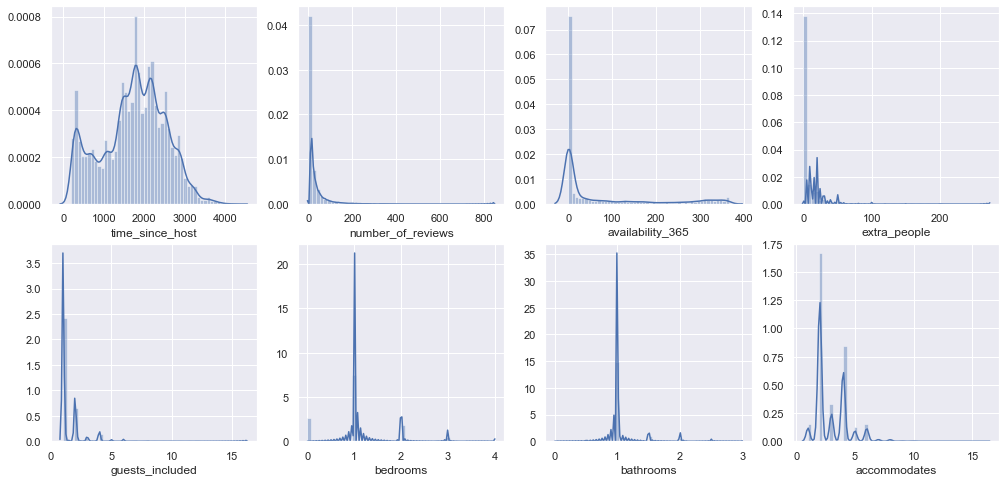

In [6]:
# Checking distribution and value range before scaling 

fig,axs=plt.subplots(2,4,figsize=(17,8))

for i in range(minmax_scale.shape[1]):
    ax = axs[i//4,i%4]
    sns.distplot(minmax_scale.iloc[:,i],ax=ax)

plt.show()

In [7]:
# Creating  copy of initial dataframe in case of mistake

df_scaled = df.copy()
df_scaled_wo_dummies = df_wo_dummies.copy()

In [8]:
# Scaling for dataframe with dummies 

    # Scaling the data using MinMax method to put all data between 0,1 because we have many columns with dummies
    # Also MixMax Scale is recommanded for algos distance-based such as KNN or XGboost

for i in range(minmax_scale.columns.shape[0]):
    df_scaled[minmax_scale.columns[i]] = (df_scaled[minmax_scale.columns[i]] - df_scaled[minmax_scale.columns[i]].min())/(df_scaled[minmax_scale.columns[i]].max()- df_scaled[minmax_scale.columns[i]].min())

    # Scaling price diving by 100 

df_scaled.price = df_scaled.price/100

df_scaled.head()

,host_is_superhost,host_identity_verified,accommodates,bathrooms,bedrooms,price,guests_included,extra_people,availability_365,number_of_reviews,instant_bookable,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,time_since_host,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_rate_25-50%,host_response_rate_50-75%,host_response_rate_75-100%,host_response_rate_None,neighbourhood_cleansed_Bourse,neighbourhood_cleansed_Buttes-Chaumont,neighbourhood_cleansed_Buttes-Montmartre,neighbourhood_cleansed_Entrepôt,neighbourhood_cleansed_Gobelins,neighbourhood_cleansed_Hôtel-de-Ville,neighbourhood_cleansed_Louvre,neighbourhood_cleansed_Luxembourg,neighbourhood_cleansed_Ménilmontant,neighbourhood_cleansed_Observatoire,neighbourhood_cleansed_Opéra,neighbourhood_cleansed_Palais-Bourbon,neighbourhood_cleansed_Panthéon,neighbourhood_cleansed_Passy,neighbourhood_cleansed_Popincourt,neighbourhood_cleansed_Reuilly,neighbourhood_cleansed_Temple,neighbourhood_cleansed_Vaugirard,neighbourhood_cleansed_Élysée,property_type_Bed and breakfast,property_type_Boutique hotel,property_type_Condominium,property_type_Hotel,property_type_House,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,0,0,0.466667,0.666667,0.75,2.56,0.333333,0.110701,0.778082,0.034360,1,0,0,0.419394,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,0,0,0.133333,0.333333,0.25,0.85,0.000000,0.000000,0.013699,0.017773,0,0,0,0.058622,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2,0,0,0.200000,0.333333,0.25,0.88,0.000000,0.000000,0.934247,0.000000,1,0,0,0.244993,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,0,0,0.066667,0.333333,0.25,0.92,0.000000,0.000000,0.084932,0.000000,0,0,0,0.438202,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,1,0.066667,0.333333,0.00,0.85,0.000000,0.000000,0.854795,0.004739,0,0,0,0.292135,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [9]:
# Scaling data for dataframe without dummies

    # Scaling the data using MinMax method for numerical columns

for i in range(minmax_scale.columns.shape[0]):
    df_scaled_wo_dummies[minmax_scale.columns[i]] = (df_scaled_wo_dummies[minmax_scale.columns[i]] - df_scaled_wo_dummies[minmax_scale.columns[i]].min())/(df_scaled_wo_dummies[minmax_scale.columns[i]].max()-df_scaled_wo_dummies[minmax_scale.columns[i]].min())

    
    # Scaling price diving by 100 
df_scaled_wo_dummies.price = df_scaled_wo_dummies.price/100

df_scaled_wo_dummies.head()


,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,bed_type,price,guests_included,extra_people,availability_365,number_of_reviews,instant_bookable,cancellation_policy,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,time_since_host
0,within an hour,75-100%,0,0,Bourse,Apartment,Entire home/apt,0.466667,0.666667,0.75,Real Bed,2.56,0.333333,0.110701,0.778082,0.034360,1,strict_14_with_grace_period,0,0,0.419394
1,within an hour,75-100%,0,0,Temple,Apartment,Entire home/apt,0.133333,0.333333,0.25,Real Bed,0.85,0.000000,0.000000,0.013699,0.017773,0,moderate,0,0,0.058622
2,within an hour,75-100%,0,0,Bourse,Apartment,Entire home/apt,0.200000,0.333333,0.25,Real Bed,0.88,0.000000,0.000000,0.934247,0.000000,1,strict_14_with_grace_period,0,0,0.244993
3,within an hour,75-100%,0,0,Buttes-Montmartre,Apartment,Entire home/apt,0.066667,0.333333,0.25,Real Bed,0.92,0.000000,0.000000,0.084932,0.000000,0,flexible,0,0,0.438202
4,within a few hours,75-100%,0,1,Buttes-Montmartre,Apartment,Entire home/apt,0.066667,0.333333,0.00,Real Bed,0.85,0.000000,0.000000,0.854795,0.004739,0,flexible,0,0,0.292135


_______________________
### Feature Engineering

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_log_error
from sklearn.feature_selection import SelectKBest, f_regression

In [10]:
# Feature Engineering using Filter method with f-regression for Linear Regression model 
# and mutual_info_regression for KNN and XGboost models

X = df.drop('price',axis=1)
y = df.price

X_scaled = df_scaled.drop('price',axis=1)
y_scaled = df_scaled.price

In [11]:
selection_freg = SelectKBest(f_regression)
X_new_freg = selection_freg.fit_transform(X_scaled,y_scaled)

In [12]:
X_new_freg = pd.DataFrame(X_new_freg)
print(X_new_freg.shape)
X_new_freg.head()

(62799, 10)


,0,1,2,3,4,5,6,7,8,9
0,0.466667,0.666667,0.75,0.333333,0.778082,1.0,1.0,0.0,0.0,1.0
1,0.133333,0.333333,0.25,0.000000,0.013699,1.0,1.0,0.0,0.0,0.0
2,0.200000,0.333333,0.25,0.000000,0.934247,1.0,1.0,0.0,0.0,1.0
3,0.066667,0.333333,0.25,0.000000,0.084932,1.0,1.0,0.0,0.0,0.0
4,0.066667,0.333333,0.00,0.000000,0.854795,0.0,1.0,0.0,0.0,0.0


In [32]:
def mape(y_true,y_pred):
    if y_true.any() == 0:
        return "dividing by 0 is impossible"
    else:
        return np.mean(np.abs((y_true-y_pred)/y_pred))*100

In [62]:
# Test using RFE method

estimator = LinearRegression()

# build RFE on non-scaled df
selection = RFE(estimator, 10)
selection.fit(X,y)
print(X.columns[selection.support_])
y_pred_rfe = selection.predict(X)
print('R2 using RFE method without scale:',r2_score(y,y_pred_rfe))
print('MAPE:',mape(y,y_pred_rfe),'\n')

# build RFE using scaled df
selection2 = RFE(estimator, 10)
selection2.fit(X_scaled,y_scaled)
print(X_scaled.columns[selection2.support_])
y_pred_rfe2 = selection2.predict(X_scaled)
print('R2 using RFE method:',r2_score(y_scaled,y_pred_rfe2))
print('MAPE:',mape(y_scaled,y_pred_rfe2),'\n')

Index(['bathrooms', 'host_response_time_a few days or more',
       'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour', 'host_response_rate_None',
       'property_type_Serviced apartment', 'room_type_Shared room',
       'cancellation_policy_super_strict_30',
       'cancellation_policy_super_strict_60'],
      dtype='object')
R2 using RFE method without scale: 0.208744830092361
MAPE: 43.69743626570243 

Index(['accommodates', 'bathrooms', 'bedrooms', 'guests_included',
       'availability_365', 'number_of_reviews', 'property_type_Hotel',
       'property_type_Serviced apartment', 'room_type_Shared room',
       'cancellation_policy_super_strict_30'],
      dtype='object')
R2 using RFE method: 0.4304100519025337
MAPE: 35.779815480271665 



In [49]:
# Try a for loop to find the best number of columns
r_score = []
mape_list = []

for i in range(2,30):
    selection = RFE(estimator, i)
    selection.fit(X_scaled,y_scaled)
    print("Number of columns",i)
    #print(X_scaled.columns[selection.support_])
    y_pred_rfe = selection.predict(X_scaled)
    r_score.append(r2_score(y_scaled,y_pred_rfe))
    #print('R2 using RFE method:',r2_score(y_scaled,y_pred_rfe))
    mape_list.append(mape(y_scaled,y_pred_rfe))
    #print('MAPE:',mape(y_scaled,y_pred_rfe),'\n')
    

Number of columns 2
Number of columns 3
Number of columns 4
Number of columns 5
Number of columns 6
Number of columns 7
Number of columns 8
Number of columns 9
Number of columns 10
Number of columns 11
Number of columns 12
Number of columns 13
Number of columns 14
Number of columns 15
Number of columns 16
Number of columns 17
Number of columns 18
Number of columns 19
Number of columns 20
Number of columns 21
Number of columns 22
Number of columns 23
Number of columns 24
Number of columns 25
Number of columns 26
Number of columns 27
Number of columns 28
Number of columns 29


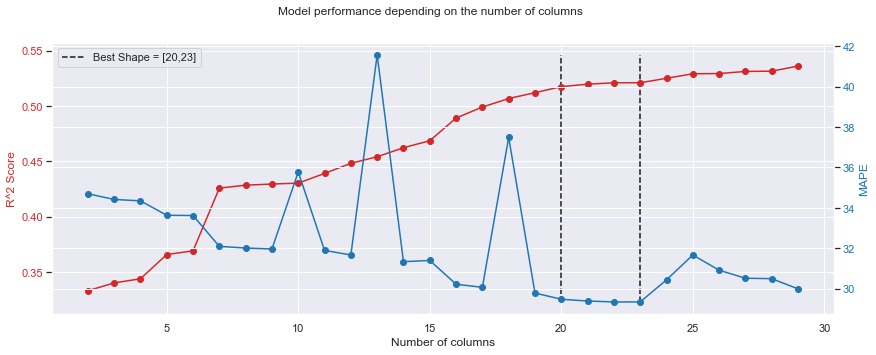

In [76]:
# Drawing graph to show the result of model performance depending on the number of columns

nb_cols = list(range(2,30))

fig, ax1 = plt.subplots(figsize=(14,5))

color = 'tab:red'
ax1.plot(nb_cols, r_score, linestyle='-', marker='o', color=color)
y0, y1 = ax1.get_ylim()
ax1.vlines(x=23,ymin=y0,ymax=y1, linestyle='dashed', label='Best Shape = [20,23]')
ax1.vlines(x=20,ymin=y0,ymax=y1, linestyle='dashed')
ax1.set_xlabel('Number of columns')
ax1.set_ylabel('R^2 Score', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('MAPE', color=color)
ax2.plot(nb_cols, mape_list, linestyle='-', marker='o', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('Model performance depending on the number of columns')
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('../img/rfe_method_model_performance.png')
plt.show()

In [66]:
# Building best selection 

best_selection = RFE(estimator, 20)
best_selection.fit(X_scaled,y_scaled)


X_new_RFE = X_scaled[X_scaled.columns[best_selection.support_]]
X_new_RFE.head()

,accommodates,bathrooms,bedrooms,guests_included,availability_365,number_of_reviews,neighbourhood_cleansed_Bourse,neighbourhood_cleansed_Hôtel-de-Ville,neighbourhood_cleansed_Louvre,neighbourhood_cleansed_Luxembourg,neighbourhood_cleansed_Palais-Bourbon,neighbourhood_cleansed_Panthéon,neighbourhood_cleansed_Passy,neighbourhood_cleansed_Temple,neighbourhood_cleansed_Élysée,property_type_Hotel,property_type_Serviced apartment,room_type_Private room,room_type_Shared room,cancellation_policy_super_strict_30
0,0.466667,0.666667,0.75,0.333333,0.778082,0.034360,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.133333,0.333333,0.25,0.000000,0.013699,0.017773,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0.200000,0.333333,0.25,0.000000,0.934247,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.066667,0.333333,0.25,0.000000,0.084932,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.066667,0.333333,0.00,0.000000,0.854795,0.004739,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
# Testing the performance of model depending on columns used (w/ and w/o filter method)

# Use df non-scaled without any feature engineering method (so all columns)
lin_model3 = LinearRegression()
lin_model_fitted3 = lin_model3.fit(X,y)
y_pred_lin3 = lin_model_fitted3.predict(X)
print('R2 w/o feature engineering methods nor scaling:',r2_score(y,y_pred_lin3))
print('MAPE:',mape(y,y_pred_lin3),'\n')

# Use df scaled without any feature engineering method (so all columns)
lin_model2 = LinearRegression()
lin_model_fitted2 = lin_model2.fit(X_scaled,y_scaled)
y_pred_lin2 = lin_model_fitted2.predict(X_scaled)
print('R2 w/o feature engineering methods:',r2_score(y_scaled,y_pred_lin2))
print('MAPE:',mape(y_scaled,y_pred_lin2),'\n')

# Use filter method
lin_model = LinearRegression()
lin_model_fitted = lin_model.fit(X_new_freg,y_scaled)
y_pred_lin = lin_model_fitted.predict(X_new_freg)
print('R2 using filter method:',r2_score(y_scaled,y_pred_lin))
print('MAPE:',mape(y_scaled,y_pred_lin),'\n')


# Use RFE method
lin_model4 = LinearRegression()
lin_model_fitted4 = lin_model4.fit(X_new_RFE,y_scaled)
y_pred_lin4 = lin_model_fitted4.predict(X_new_RFE)
print('R2 using RFE method:',r2_score(y_scaled,y_pred_lin4))
print('MAPE:',mape(y_scaled,y_pred_lin4))


# Not using RMSLE here because I got an error on negative predicted values 
# code: print('RMSLE:',(mean_squared_log_error(y_scaled,abs(y_pred_lin4))**0.5),'\n')


R2 w/o feature engineering methods nor scaling: 0.5487733683760412
MAPE: 36.712373111398094 

R2 w/o feature engineering methods: 0.5487717338906071
MAPE: inf 

R2 using filter method: 0.45080135930047394
MAPE: 31.253171304275877 

R2 using RFE method: 0.5175946212055462
MAPE: 29.479436693936073


In [68]:
y_pred_lin4[y_pred_lin4<0]*100

array([ -9.9590157 , -16.654531  ,  -0.96860803,  -2.88989116,
        -0.96860803,  -7.76541695])

### Comments

- using scaling is better for linear regression especially if using RFE method for feature engineering
- filter method seems to have better performance than RFE (R2 is better) but errors are the same
- In any case it is better to use feature engineering methods because errors are smaller

**Possible improvements:**
- test Sequential Selection to find out the best number of features needed and compare results with other methods
- run PCA

**Next steps:**
- ~~test with different number of features~~
- ~~export new csv with scaled data and RFE method~~
- ~~run LinearRegression, KNN and RandomForest models to compare results using evaluation metrics for regression~~~

In [71]:
# Saving the new csv with feature engineering methods

feat_df = df_scaled[list(df_scaled[X_new_RFE.columns])+['price']]
print(feat_df.shape)

feat_df.to_csv('../data/airbnb_paris_clean_RFE.csv',index=False)

(62799, 21)


In [ ]:
# Saving the new scaled csv without dummies 

df_scaled_wo_dummies.to_csv('../data/airbnb_paris_clean_wo_dummies_feat.csv',index=False)